In [1]:
import nbsetup
import numpy as np
import pandas as pd
import seaborn as sns
from helpers.ergodic import ErgodicEnsemble

In [2]:
# Standardise 
MAX = 200
ENSEMBLES = 7
OBS = 10000

def gen_ee(func):
    data = []
    for i in range(ENSEMBLES):
        row = func()
        data.append(row)
    data = np.array(data)
    bins = np.linspace(int(np.floor(data.min())), int(np.ceil(data.max())), int(OBS*0.01))
    ee = ErgodicEnsemble(observations=data, bins=bins)
    return ee

ensemble
0.1% ergodic complexity
5.583 (5.589) average ensemble (ergodic)
From 7 ensembles
With bins 100 from 17.0 to 200.0.



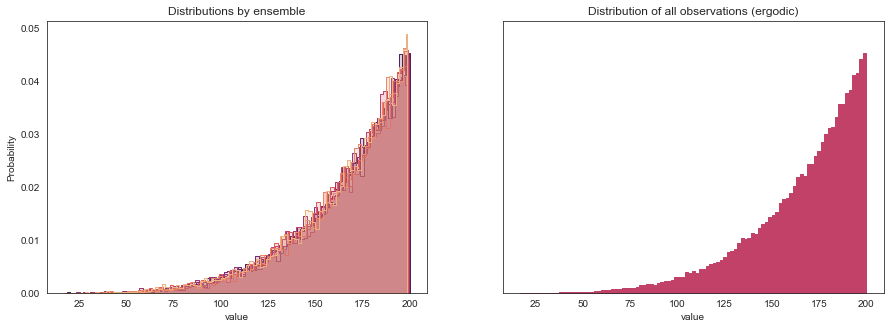

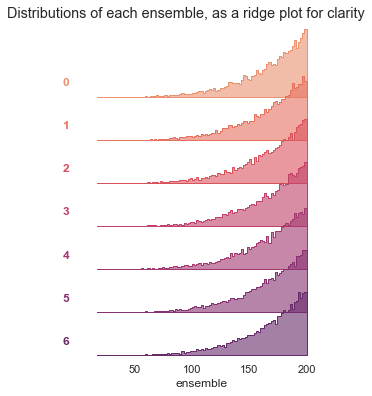

In [3]:
eep = gen_ee(lambda: np.random.power(5,OBS)*MAX)
eep.stats()
eep.plot()
eep.ridge()

In [4]:
eep.scatter()

TypeError: scatter() got an unexpected keyword argument 'size'

In [ ]:
def uni_data():
    mu = np.random.normal(MAX/2, 1)
    return np.random.normal(mu, 0.5, 1000)

eeu = gen_ee(uni_data)
eeu.stats()
eeu.plot()
eeu.ridge()

In [ ]:
eeu.scatter()

https://www.youtube.com/watch?v=LGqOH3sYmQA

In [ ]:
ensembles = 1
timesteps = 100

data = {'x': np.arange(timesteps+1)}
for i in range(ensembles):
    series = [100]
    for t in range(timesteps):
        if np.random.choice([True, False]):
            s = series[t]*1.5
        else:
            s = series[t]*0.6
        series.append(s)
    data[i] = np.array(series)

df = pd.DataFrame(data)
g = sns.lineplot(x='x', y='value', ci=None, hue='variable', data=df.melt(id_vars=['x']), legend=0)
g.set(yscale='log')